In [1]:
# Importing Required Python Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

In [2]:
# Reading the CSV File
bank_df = pd.read_csv('bank_additional_full.csv',sep=';',na_values='unknown')

In [3]:
bank_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Examining the Dataset


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank_df['y'].value_counts(dropna=False)

no     36548
yes     4640
Name: y, dtype: int64

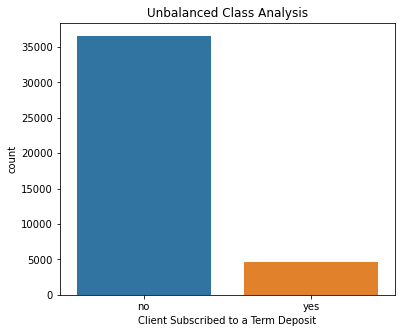

In [6]:
# Plotting the Response variable y
plt.figure(figsize=(6,5))
sns.countplot(x='y',data=bank_df)
plt.xlabel('Client Subscribed to a Term Deposit')
plt.title('Unbalanced Class Analysis')
plt.show()

### From above we can see that the dataset is highly imbalanced. 

In [7]:
# Converting the Response variable y values to binary numbers 0 & 1
bank_df['y'] = bank_df['y'].map({'no':0,'yes':1})

In [8]:
# Standardizing the Column Names
bank_df.columns = bank_df.columns.str.strip().str.replace('.','_')

In [9]:
# Examining the Column name change result
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


###  Examining the Null Values

In [10]:
# Determining  No. of Null Values in column of the dataset
bank_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

In [11]:
# Determining % of null values in each column of the dataset
bank_df.isnull().mean()*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
campaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp_var_rate       0.000000
cons_price_idx     0.000000
cons_conf_idx      0.000000
euribor3m          0.000000
nr_employed        0.000000
y                  0.000000
dtype: float64

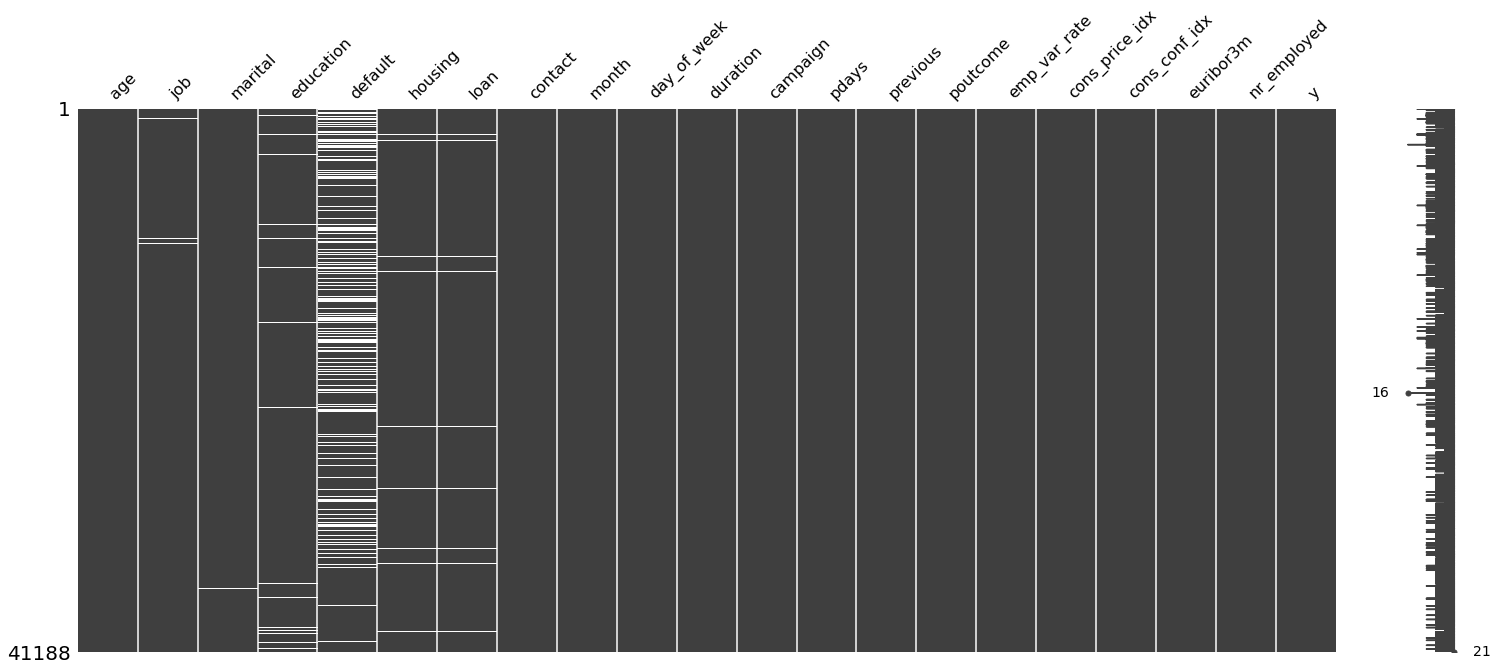

In [12]:
import missingno as msno
msno.matrix(bank_df)
plt.show()

### From above we can see that all the missing values are in categorical columns. And around 21% of the values are missing in the default column.

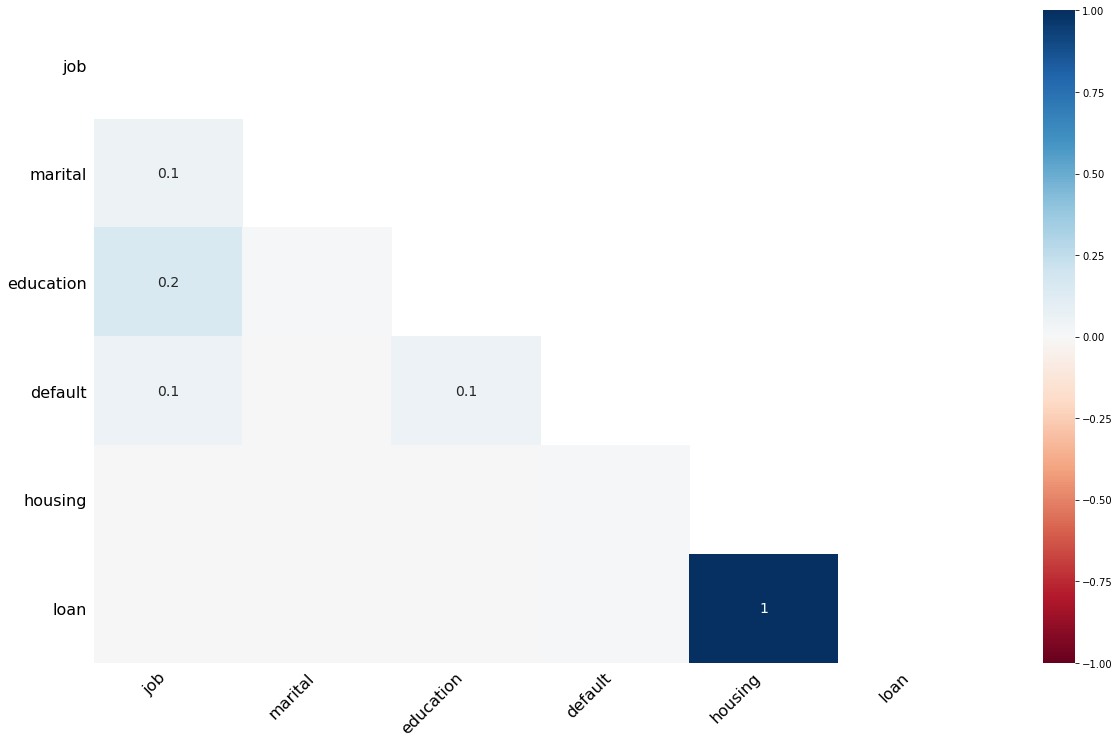

In [13]:
msno.heatmap(bank_df)
plt.show()

### From above we can clearly view that Missing values in housing loan and personal loan columns are perfectly correlated . There might be an underlying reason to it. 

## Examining the Numerical columns of the dataset

In [14]:
#Segregating the Numerical Columns 
num_df = bank_df.select_dtypes(include=np.number)

In [15]:
# Checking the numerical dataset
num_df.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0


In [16]:
# Making Sure that there are no missing values in the numerical columns
num_df.isna().sum().sum()

0

In [17]:
# Converting the duration of the calls from seconds to mins.
num_df['duration'] = (num_df['duration']/60).round(2)

In [18]:
# Segregating Numerical Features (X) from the response variable (y)
target = num_df['y']
X_num = num_df.drop(columns='y')

In [19]:
X_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   duration        41188 non-null  float64
 2   campaign        41188 non-null  int64  
 3   pdays           41188 non-null  int64  
 4   previous        41188 non-null  int64  
 5   emp_var_rate    41188 non-null  float64
 6   cons_price_idx  41188 non-null  float64
 7   cons_conf_idx   41188 non-null  float64
 8   euribor3m       41188 non-null  float64
 9   nr_employed     41188 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 3.1 MB


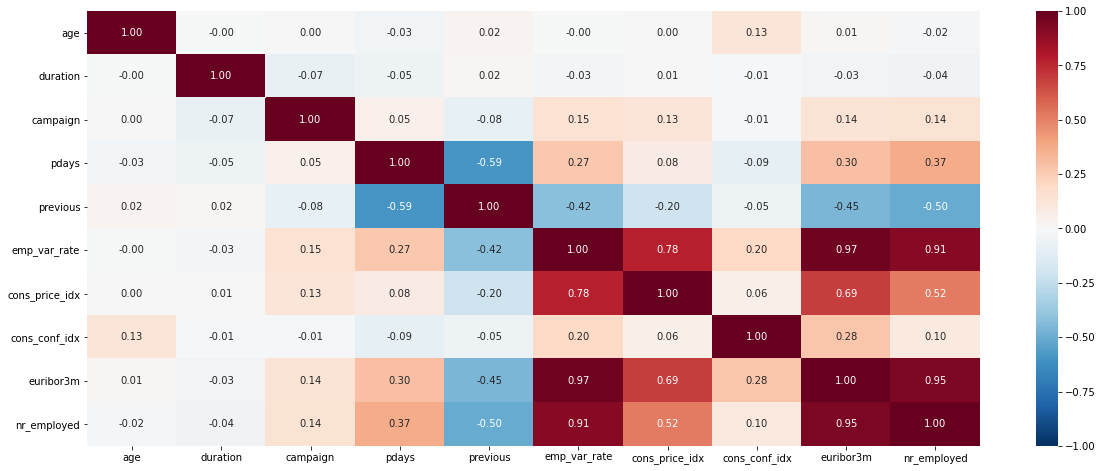

In [20]:
# Checking for the correlations between different numerical columns
plt.figure(figsize=(20,8))
sns.heatmap(X_num.corr(),fmt='.2f',annot=True,cmap='RdBu_r',vmin=-1,vmax=1)
plt.show()

### From above we can clearly visualize that various socio economic variables such as nr_employed, euribor are highly correlated with each other. We may need to remove some of them. But let's try if  mean centering each column reduces multi-collinearity.

In [21]:
X_num_cen = X_num-X_num.mean()

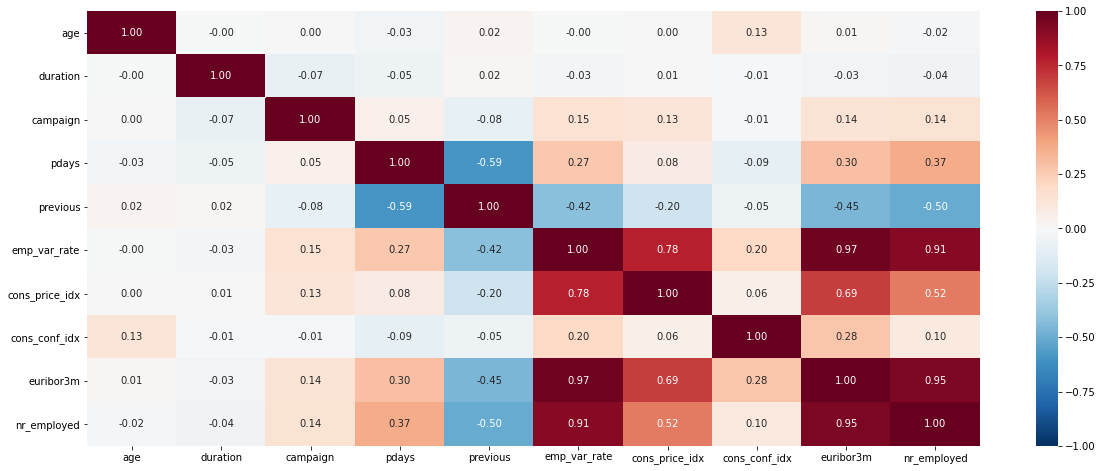

In [22]:
# Checking for the correlations between different mean centered numerical columns
plt.figure(figsize=(20,8))
sns.heatmap(X_num_cen.corr(),fmt='.2f',annot=True,cmap='RdBu_r',vmin=-1,vmax=1)
plt.show()

### From above, as expected  we can clearly see that mean centering doesn't take care of multicollineraity.

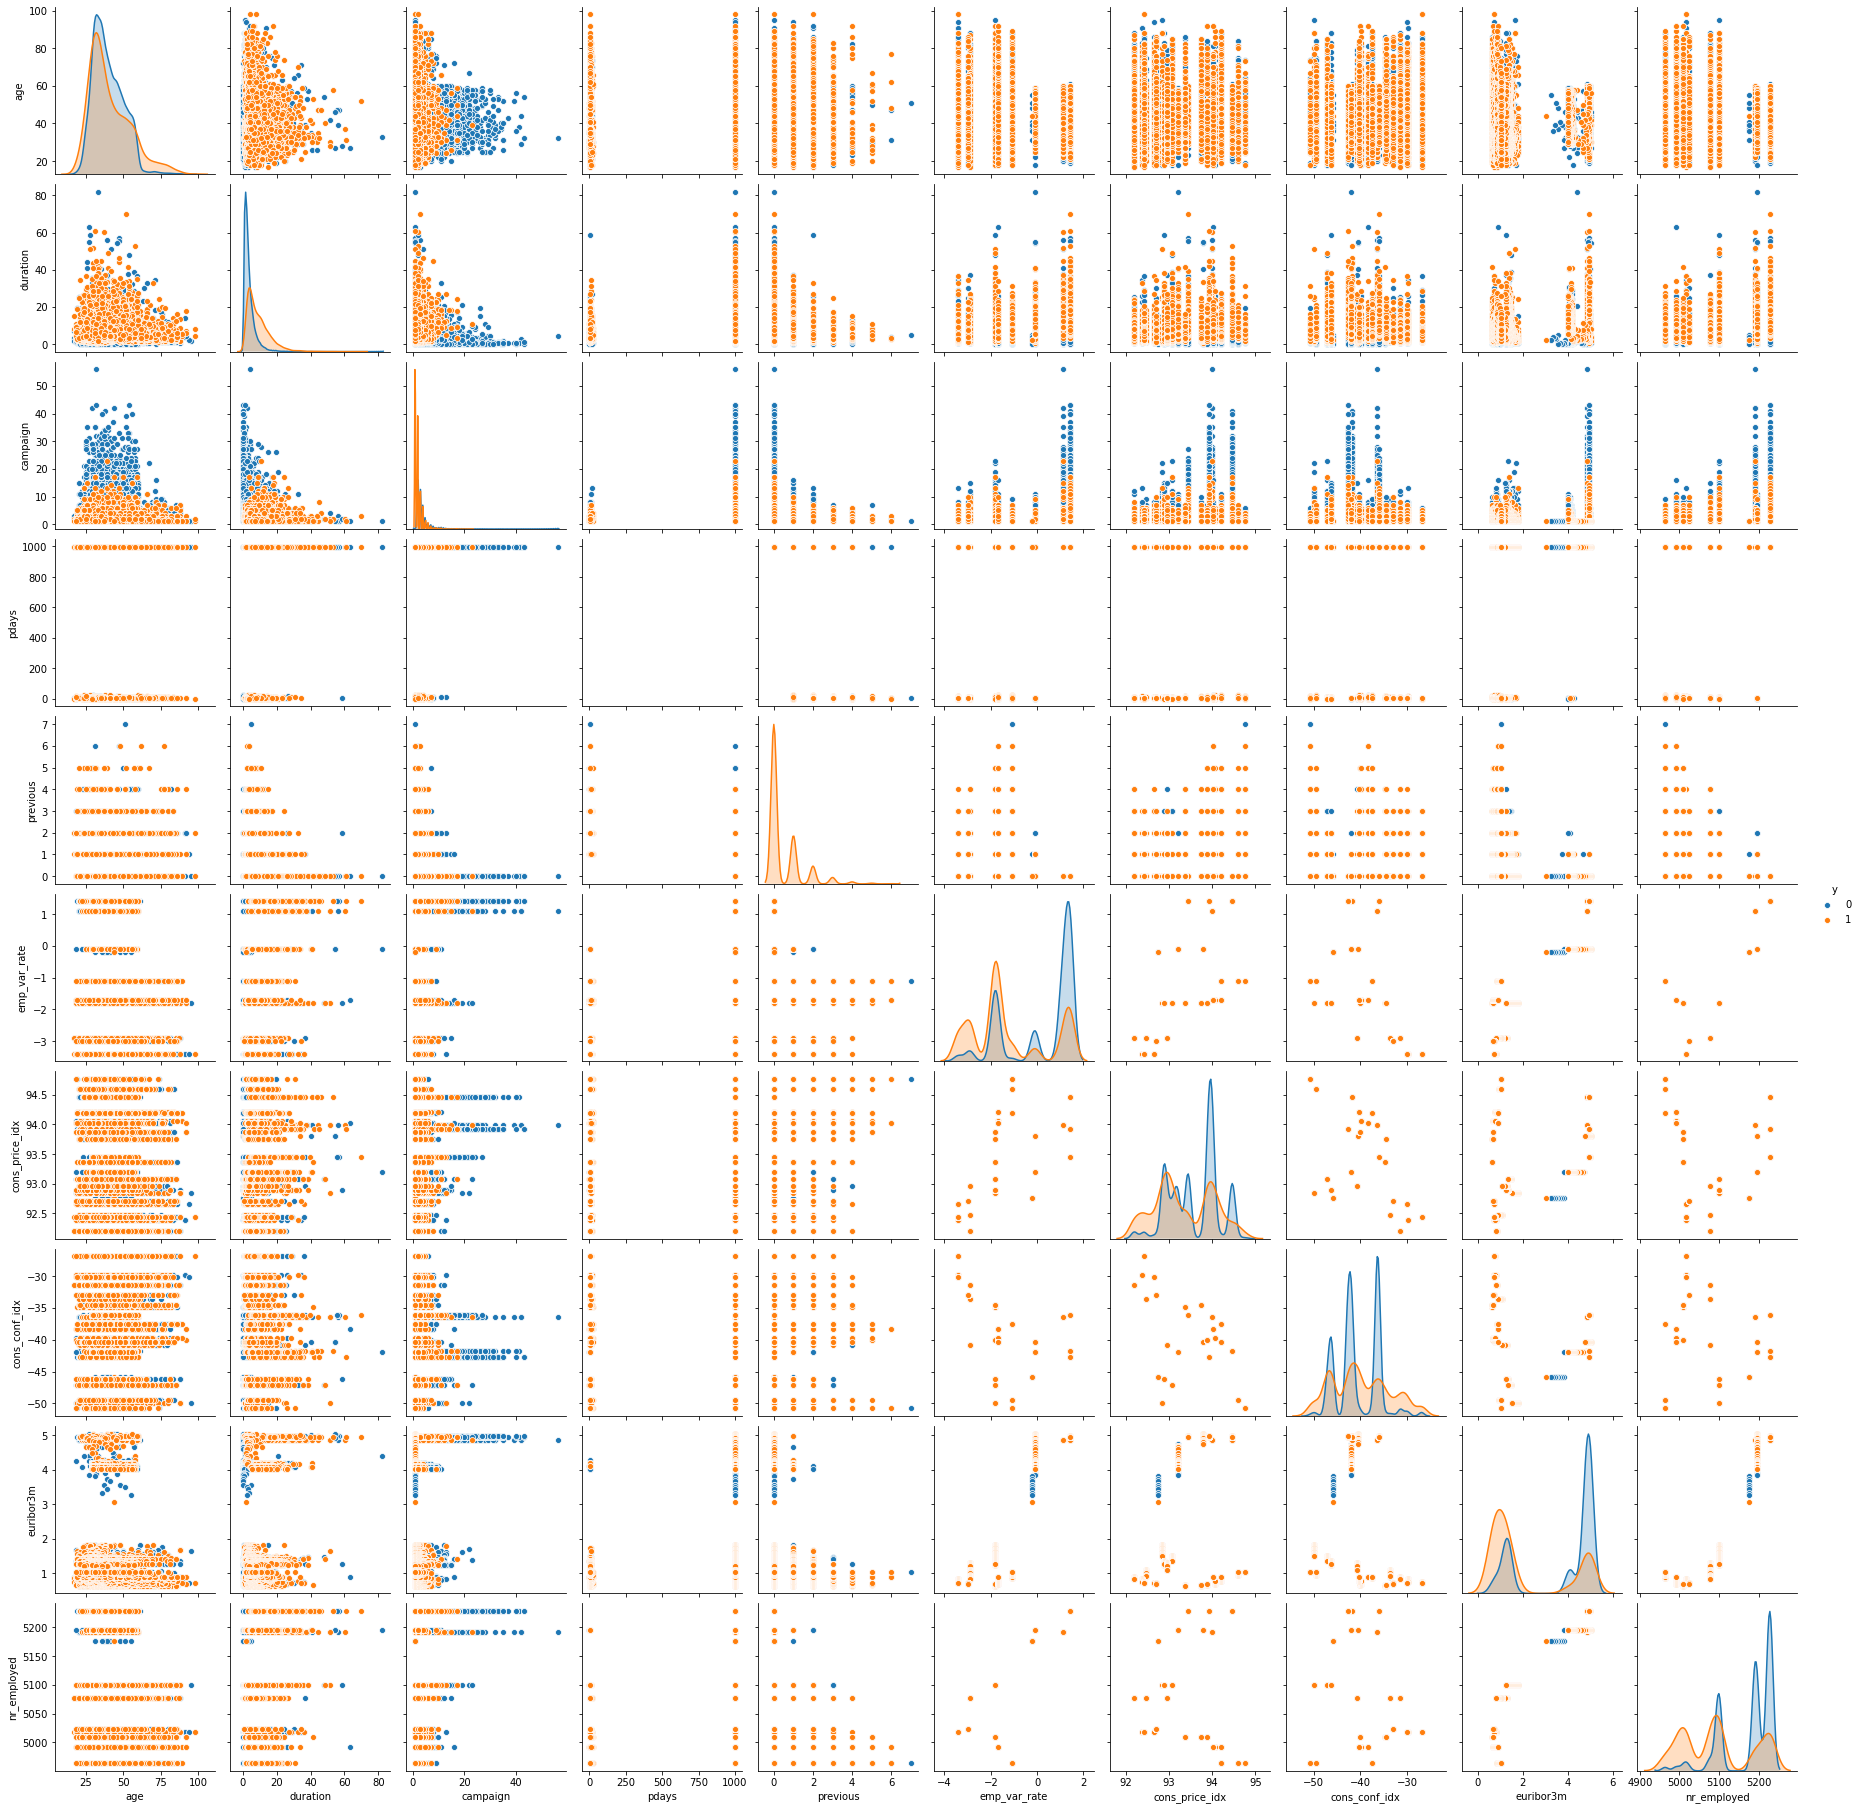

In [21]:
# Plotting the pair plot of the numerical variables with hue set to Response variable y
sns.pairplot(data=num_df,hue='y')
plt.show()

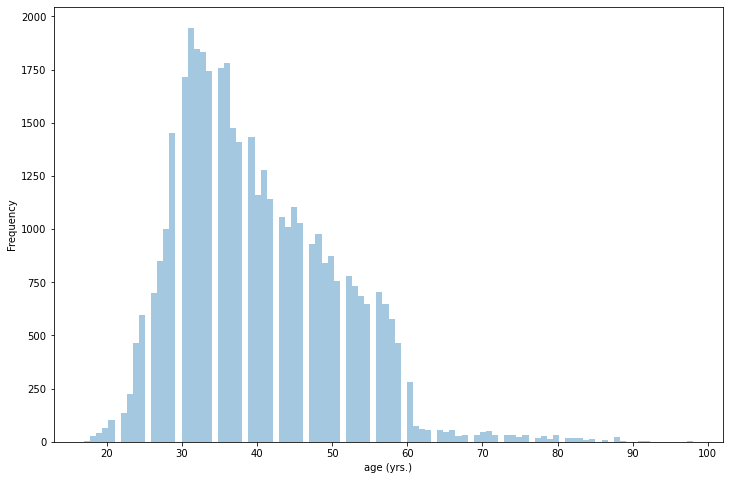

In [50]:
# plotting the histogram of age column.
plt.figure(figsize=(12,8))
sns.distplot(num_df['age'],bins=100,kde=False)
plt.xlabel('age (yrs.)')
plt.ylabel('Frequency')
plt.show()

In [23]:
num_df['age'].value_counts().head(25)

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
Name: age, dtype: int64

### From the above graph and analysis it is clear that the campaign was mostly targeted towards people in their 30s-40s , which made sense as this segment would be more interested in saving for the future.

In [51]:
# Grouping the num_df datframe column by the response variable y
df_group = num_df.groupby('y',as_index=False)

In [53]:
# getting the group corresponding to non_subscibers
df_y0 = df_group.get_group(0)

In [67]:
# Getting mean age  for non_subscribers
print('The Mean age for non_subscribers is :',round(df_y0['age'].mean(),2),'yrs.')

The Mean age for non_subscribers is : 39.91 yrs.


In [68]:
# Getting median age  for non_subscribers
print('The Median age for non_subscribers is :',round(df_y0['age'].median(),2),'yrs.')

The Median age for non_subscribers is : 38.0 yrs.


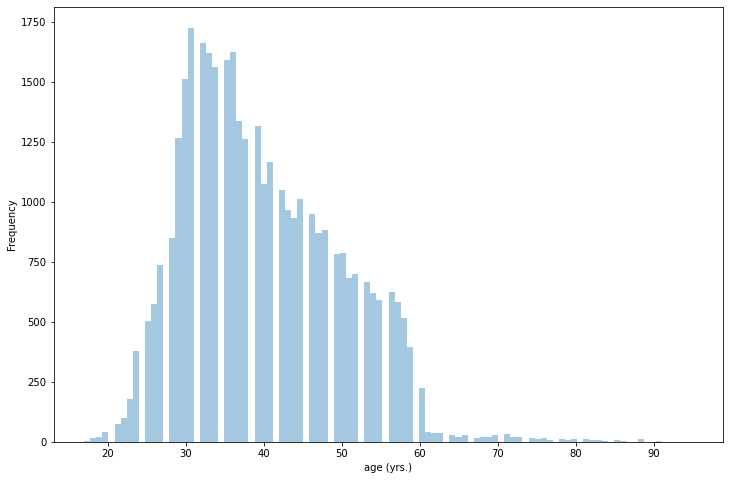

In [62]:
# Plotting the histogram for age for y=0,i.e. for the non-subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y0['age'],bins=100,kde=False)
plt.xlabel('age (yrs.)')
plt.ylabel('Frequency')
plt.show()

In [58]:
# getting the group corresponding to subscibers
df_y1 = df_group.get_group(1)

In [69]:
# Getting mean age for subscribers
print('The Mean age for subscribers is :',round(df_y1['age'].mean(),2),'yrs.')

The Mean age for subscribers is : 40.91 yrs.


In [70]:
# Getting median age  for subscribers
print('The Median age for subscribers is :',round(df_y1['age'].median(),2),'yrs.')

The Median age for subscribers is : 37.0 yrs.


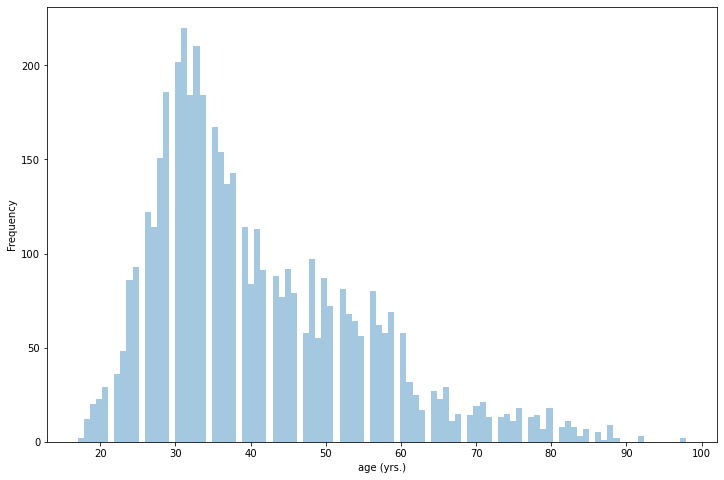

In [64]:
# Plotting the histogram for age for y=1,i.e. for the subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y1['age'],bins=100,kde=False)
plt.xlabel('age (yrs.)')
plt.ylabel('Frequency')
plt.show()

### From the above analysis it is clear that older people are more inclined towards term deposits than their younger counterparts as they more more risk averse , with regards to savings for their future.

In [71]:
# Getting mean duration for non_subscribers
print('The Mean duration for non_subscribers is :',round(df_y0['duration'].mean(),2),'mins')

The Mean duration for non_subscribers is : 3.68 mins


In [72]:
# Getting median duration for non_subscribers
print('The Median duration for non_subscribers is :',round(df_y0['duration'].median(),2),'mins')

The Median duration for non_subscribers is : 2.73 mins


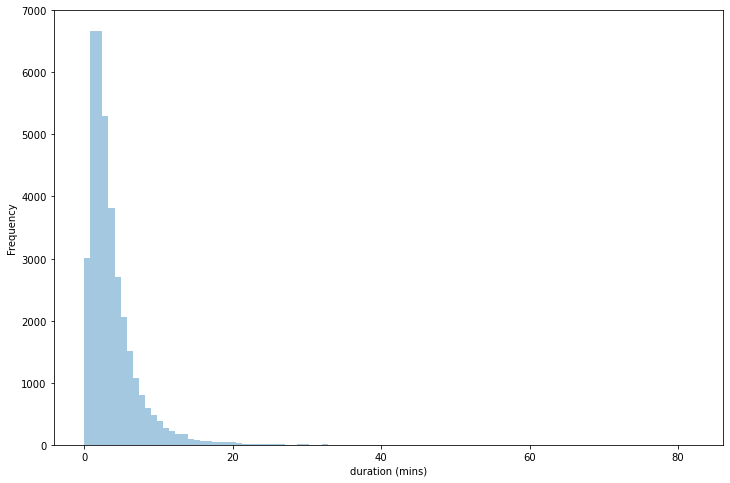

In [65]:
# Plotting the histogram for duration for y=0,i.e. for the non-subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y0['duration'],bins=100,kde=False)
plt.xlabel('duration (mins)')
plt.ylabel('Frequency')
plt.show()

In [73]:
# Getting  mean duration for subscribers
print('The Mean duration for subscribers is :',round(df_y1['duration'].mean(),2),'mins.')

The Mean duration for subscribers is : 9.22 mins.


In [74]:
# Getting median duration  for subscribers
print('The Median duration for subscribers is :',round(df_y1['duration'].median(),2),'mins.')

The Median duration for subscribers is : 7.48 mins.


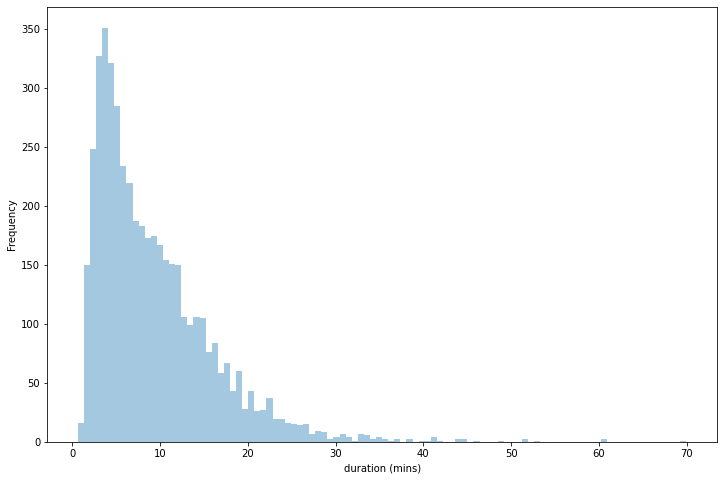

In [75]:
# Plotting the histogram for duration for y=0,i.e. for the non-subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y1['duration'],bins=100,kde=False)
plt.xlabel('duration (mins)')
plt.ylabel('Frequency')
plt.show()

### From above we can clearly see that shorter duration calls are more associated with non-subscribers. So this may be a very important variable to watch out for. But after a call the, outcome is more or less known. So this may be leaking information, so in order to have a realistic predictive model , we would remove this variable from set of features

In [77]:
# Getting mean no. of contacts for non_subscribers
print('The Mean no. of contacts made to non_subscribers are :',round(df_y0['campaign'].mean(),2))

The Mean no. of contacts made to non_subscribers are : 2.63


In [78]:
# Getting median no. of contacts for non_subscribers
print('The Median no. of contacts made to non_subscribers are :',round(df_y0['campaign'].median(),2))

The Median no. of contacts made to non_subscribers are : 2.0


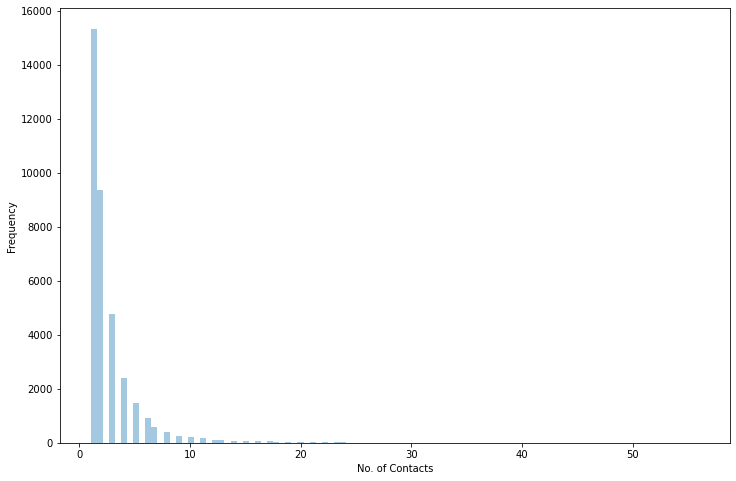

In [79]:
# Plotting the histogram for contacts for y=0,i.e. for the non-subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y0['campaign'],bins=100,kde=False)
plt.xlabel('No. of Contacts')
plt.ylabel('Frequency')
plt.show()

In [81]:
# Getting mean no. of contacts for subscribers
print('The Mean no. of contacts made to subscribers are :',round(df_y1['campaign'].mean(),2))

The Mean no. of contacts made to subscribers are : 2.05


In [82]:
# Getting median no. of contacts for subscribers
print('The Median no. of contacts made to subscribers are :',round(df_y1['campaign'].median(),2))

The Median no. of contacts made to subscribers are : 2.0


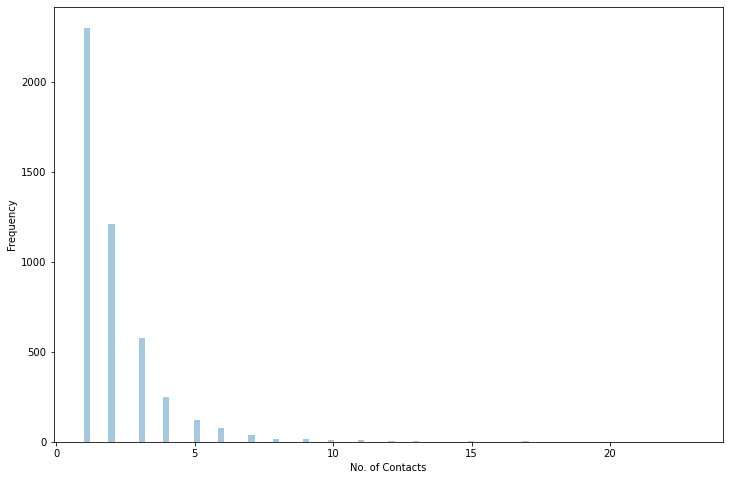

In [85]:
# Plotting the histogram for contacts for y=1,i.e. for the subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y1['campaign'],bins=100,kde=False)
plt.xlabel('No. of Contacts')
plt.ylabel('Frequency')
plt.show()

### From the above analysis & plots we can see that on an average it took less no. of contacts to be made with a  subscriber than with a non-subscriber. Thus marketing team tried hard to convert the potential clients to their term deposit customer. The above observation is also obvious, as-if a customer has been contacted so many times and has not yet subscribed , It may be difficult to convince him/her.

In [88]:
# Getting mean no. of days ,since the last contact from a previous campaign, for non_subscribers
print('The Mean no. of days since the last contact during previous campaign for non_subscribers are:',round(df_y0['pdays'].mean(),2),'days')

The Mean no. of days since the last contact during previous campaign for non_subscribers are: 984.11 days


In [90]:
# Getting Median no. of days since the last contact from a previous campaign, for non_subscribers
print('The Median no. of days since the last contact during previous campaign for non_subscribers are:',round(df_y0['pdays'].median(),2),'days')

The Median no. of days since the last contact during previous campaign for non_subscribers are: 999.0 days


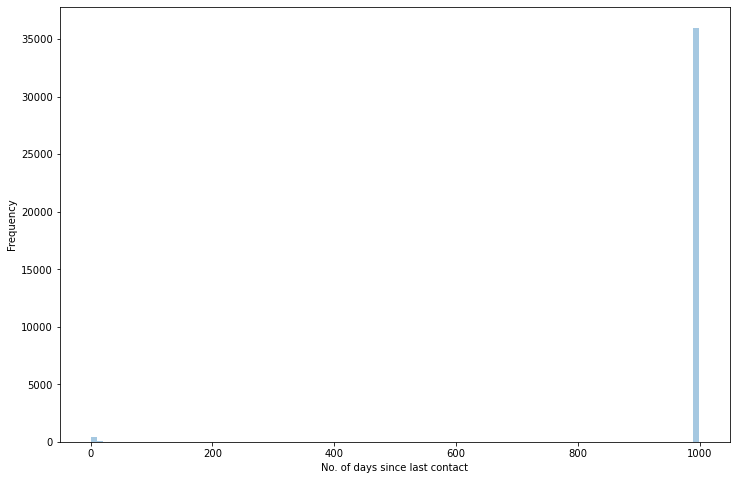

In [92]:
# Plotting the histogram for no. of days since the last contact for y=0,i.e. for the non-subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y0['pdays'],bins=100,kde=False)
plt.xlabel('No. of days since last contact')
plt.ylabel('Frequency')
plt.show()

In [93]:
# Getting mean no. of days ,since the last contact from a previous campaign, for subscribers
print('The Mean no. of days since the last contact during previous campaign for subscribers are:',round(df_y1['pdays'].mean(),2),'days')

The Mean no. of days since the last contact during previous campaign for subscribers are: 792.04 days


In [94]:
# Getting Median no. of days since the last contact from a previous campaign, for subscribers
print('The Median no. of days since the last contact during previous campaign for subscribers are:',round(df_y1['pdays'].median(),2),'days')

The Median no. of days since the last contact during previous campaign for subscribers are: 999.0 days


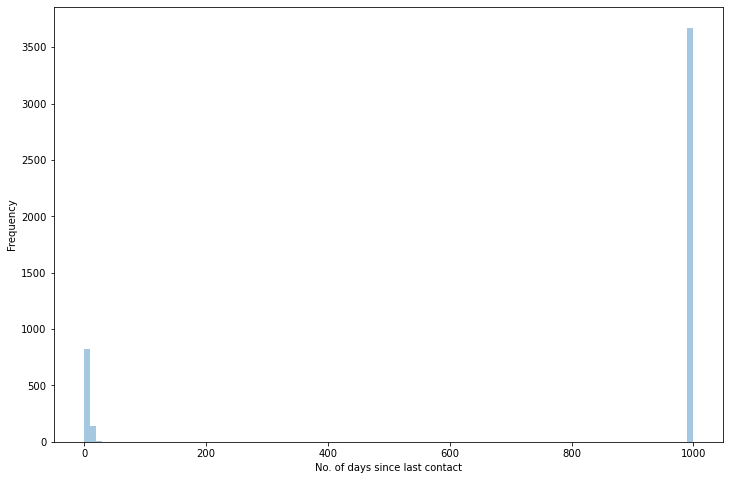

In [95]:
# Plotting the histogram for no. of days since the last contact for y=1,i.e. for the subscribers
plt.figure(figsize=(12,8))
sns.distplot(df_y1['pdays'],bins=100,kde=False)
plt.xlabel('No. of days since last contact')
plt.ylabel('Frequency')
plt.show()

### From the above  plot , it is clear that mostly new people were contacted for the term deposit. Further comparitively more % of customers who were contacted again subscribed to term deposit than the totally new ones. May be re-contacting the old ones would have resulted in more sucess. 


In [97]:
# Getting mean no. of contacts made with non_subscribers before this campaign
print('The Mean no. of contacts made with non_subscribers before this campaign are:',round(df_y0['previous'].mean(),2))

The Mean no. of contacts made with non_subscribers before this campaign are: 0.13


In [98]:
# Getting Median no. of contacts made with non_subscribers before this campaign
print('The Median no. of contacts made with non_subscribers before this campaign are:',round(df_y0['previous'].median(),2))

The Median no. of contacts made with non_subscribers before this campaign are: 0.0


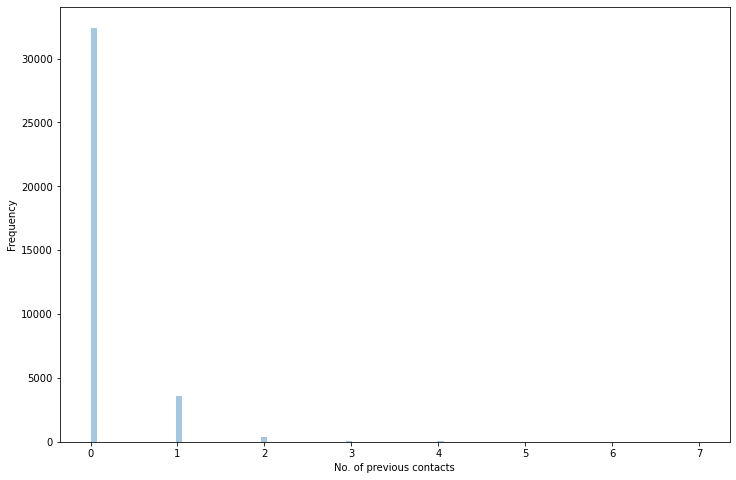

In [99]:
# Plotting the histogram for no. of contacts made with non_subscribers before this campaign.
plt.figure(figsize=(12,8))
sns.distplot(df_y0['previous'],bins=100,kde=False)
plt.xlabel('No. of previous contacts')
plt.ylabel('Frequency')
plt.show()

In [100]:
# Getting mean no. of contacts made with subscribers before this campaign
print('The Mean no. of contacts made with subscribers before this campaign are:',round(df_y1['previous'].mean(),2))

The Mean no. of contacts made with subscribers before this campaign are: 0.49


In [101]:
# Getting Median no. of contacts made with subscribers before this campaign
print('The Median no. of contacts made with subscribers before this campaign are:',round(df_y1['previous'].median(),2))

The Median no. of contacts made with subscribers before this campaign are: 0.0


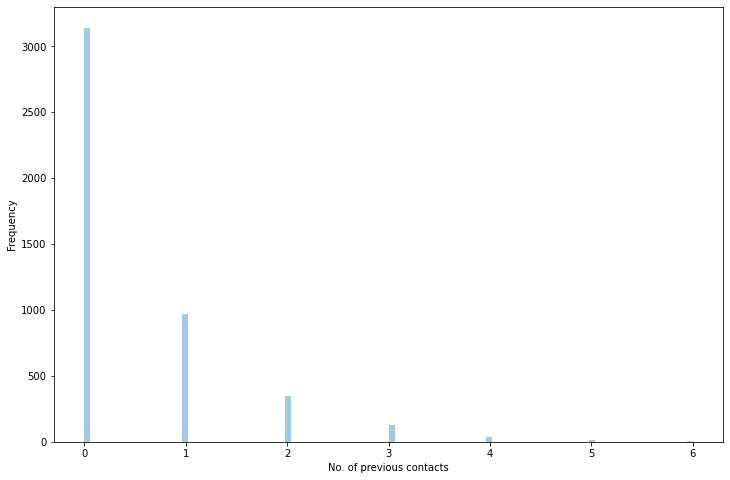

In [102]:
# Plotting the histogram for no. of contacts made with subscribers before this campaign.
plt.figure(figsize=(12,8))
sns.distplot(df_y1['previous'],bins=100,kde=False)
plt.xlabel('No. of previous contacts')
plt.ylabel('Frequency')
plt.show()

### The analysis and graph reiterates the same observation that mostly new customers(i.e. never contacted before) were contacted for this term deposit scheme, which partially may be the reason for low subscription rate for the project.

## Analyzing Socio-economic factors for Non subscribers vs  Subscribers.

In [110]:
# Getting the mean values of various Socio-Economic factors for the Non Subscribers.
ls = ['emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
NS = df_y0[ls].mean()
NS.index = ['Mean_'+x for x in ls ]
NS

Mean_emp_var_rate         0.248875
Mean_cons_price_idx      93.603757
Mean_cons_conf_idx      -40.593097
Mean_euribor3m            3.811491
Mean_nr_employed       5176.166600
dtype: float64

In [111]:
# Getting the mean values of various Socio-Economic factors for the Subscribers.
ls = ['emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
S = df_y1[ls].mean()
S.index = ['Mean_'+x for x in ls ]
S

Mean_emp_var_rate        -1.233448
Mean_cons_price_idx      93.354386
Mean_cons_conf_idx      -39.789784
Mean_euribor3m            2.123135
Mean_nr_employed       5095.115991
dtype: float64

### From above we can see Subscriptions were made to term deposits, when the underlying economic conditions were better on average.

### Storing the Numerical Dataframe to a csv file.

In [112]:
# Saving the Numerical Dataframe to CSV File
num_df.to_csv('Num_df.csv',index=False)